In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from ghost_cifar10_models.ghost_resnet import resnet50

In [2]:
my_model = resnet50(pretrained=True)
my_model.eval() 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
from torchvision import transforms, io
import torchvision
from PIL import Image
import os

### Read one image

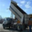

In [4]:
img = Image.open("cifar10_32/n50.png")
width, height = img.size
img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


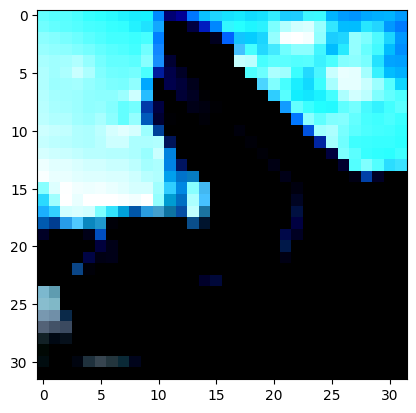

In [5]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.4914, 0.4822, 0.4465], std = [0.2471, 0.2435, 0.2616])
])

input_tensor = preprocess(img)
plt.imshow(input_tensor.permute(1, 2, 0)  )

### Read all images

In [6]:
images_png = [name for name in os.listdir("cifar10_32") if os.path.splitext(name)[-1] == '.png']
images_png = [int(v.split(".")[0][1:]) for v in images_png]
images_png.sort()
images_png = ["n"+str(v)+".png"for v in images_png]

In [7]:
n_images = len(images_png)
test_images = torch.zeros(n_images, 3, width, height, dtype=torch.uint8)

for i, image_png in enumerate(images_png):
    test_images[i] = io.read_image(os.path.join("cifar10_32", image_png))
    
#make sure to change type of tensor to float and normalize between 0 and 1
x_test = test_images.float() / 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


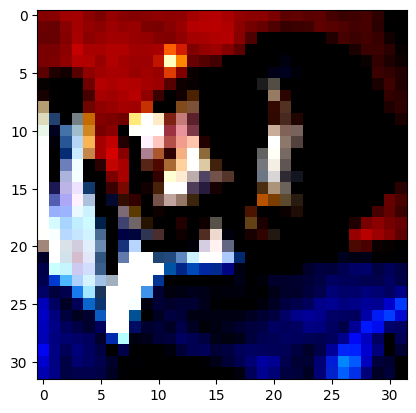

In [8]:
preprocess = transforms.Compose([
    transforms.Normalize(mean = [0.4914, 0.4822, 0.4465], std = [0.2471, 0.2435, 0.2616])
])
x_test = preprocess(x_test)
plt.imshow(x_test[0,:,:,:].permute(1, 2, 0) )

### test prediciton of ghost network

In [9]:
## batch size predictions
# batch_size = 2
# n_iterations = int(n_images/batch_size)
# with torch.no_grad():
#     for i in range(n_iterations):
#         y_test = torch.argmax(torch.softmax(my_model(x_test[i*batch_size:i*batch_size+batch_size,:,:,:]), dim=1),1)
#         print(i," ",y_test)
# print(torch.argmax(torch.softmax(my_model(x_test[i*batch_size+batch_size:,:,:,:]), dim=1),1))

In [10]:
# batch size predictions predict all
with torch.no_grad():
    y_test = torch.argmax(torch.softmax(my_model(x_test), dim=1),1)
print(y_test)

***** tensor(1.0168)
***** tensor(0.9981)
***** tensor(0.9774)
***** tensor(1.0012)
***** tensor(0.9986)
***** tensor(1.0026)
***** tensor(0.9934)
***** tensor(1.0046)
***** tensor(1.0053)
***** tensor(0.9982)
***** tensor(0.9975)
***** tensor(1.0011)
***** tensor(0.9948)
***** tensor(1.0039)
***** tensor(0.9974)
***** tensor(0.9993)
tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 9, 9, 5, 4, 6, 5, 6, 0, 9, 3, 1,
        7, 6, 9, 8, 3, 3, 8, 8, 7, 7, 7, 3, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6,
        8, 8, 0, 2, 9, 3, 5, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6,
        6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 3, 7,
        8, 3, 1, 2, 8, 2, 8, 3, 3, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3,
        8, 7, 6, 5, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 3, 4, 2, 1, 3, 6, 8, 4, 8, 4,
        5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 3, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8,
        0, 1, 7, 2, 8, 8

In [11]:
with torch.no_grad():
    y_test = torch.argmax(torch.softmax(my_model(x_test), dim=1),1)
print(y_test)

***** tensor(1.0124)
***** tensor(0.9990)
***** tensor(1.0023)
***** tensor(1.0081)
***** tensor(1.0049)
***** tensor(1.0033)
***** tensor(0.9932)
***** tensor(0.9975)
***** tensor(0.9987)
***** tensor(0.9976)
***** tensor(1.0043)
***** tensor(0.9981)
***** tensor(0.9964)
***** tensor(0.9926)
***** tensor(1.0020)
***** tensor(0.9995)
tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 9, 9, 5, 4, 6, 5, 6, 0, 9, 3, 1,
        7, 6, 9, 8, 3, 3, 8, 8, 7, 7, 7, 3, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6,
        8, 8, 0, 2, 9, 3, 5, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6,
        6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 3, 7,
        8, 3, 1, 2, 8, 2, 8, 3, 3, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3,
        8, 7, 6, 5, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 3, 4, 2, 1, 3, 6, 8, 4, 8, 4,
        5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 3, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8,
        0, 1, 7, 2, 8, 8

In [12]:
with torch.no_grad():
    y_test = torch.argmax(torch.softmax(my_model(x_test), dim=1),1)
print(y_test)

***** tensor(1.0022)
***** tensor(1.0030)
***** tensor(1.0161)
***** tensor(0.9864)
***** tensor(1.0096)
***** tensor(0.9956)
***** tensor(0.9932)
***** tensor(0.9967)
***** tensor(1.0043)
***** tensor(0.9950)
***** tensor(1.0006)
***** tensor(1.0024)
***** tensor(0.9996)
***** tensor(0.9986)
***** tensor(1.0020)
***** tensor(0.9984)
tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 9, 9, 5, 4, 6, 5, 6, 0, 9, 3, 1,
        7, 6, 9, 8, 3, 3, 8, 8, 7, 7, 7, 3, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6,
        8, 8, 0, 2, 9, 3, 5, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6,
        6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 3, 7,
        8, 3, 1, 2, 8, 2, 8, 3, 3, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3,
        8, 7, 6, 5, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 3, 4, 2, 1, 3, 6, 8, 4, 8, 4,
        5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 3, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8,
        0, 1, 7, 2, 8, 8

In [13]:
dict_y_test = np.load("cifar10_image_to_label.npy", allow_pickle = True)[()]
y_test = torch.Tensor(list(dict_y_test.values()))
y_test = y_test.type(torch.LongTensor)
y_test

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6,
        8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6,
        6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7,
        8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3,
        8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4,
        5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8,
        0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0,
        7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5,
        1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7,
        0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0,
        7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0,

### Ghost networks with PGD

In [14]:
#!pip install git+https://github.com/RobustBench/robustbench.git
import robustbench
from robustbench.utils import load_model,clean_accuracy
from robustbench.data import load_cifar10

import torchattacks

In [15]:
attack = torchattacks.PGD(my_model, eps=8/255, alpha=1/255, steps=10, random_start=True)
adv_images = attack(x_test, y_test)

***** tensor(1.0113)
***** tensor(1.0078)
***** tensor(1.0074)
***** tensor(1.0077)
***** tensor(0.9961)
***** tensor(1.0047)
***** tensor(1.0036)
***** tensor(0.9993)
***** tensor(1.0005)
***** tensor(0.9994)
***** tensor(1.0015)
***** tensor(1.0002)
***** tensor(1.0017)
***** tensor(1.0019)
***** tensor(0.9975)
***** tensor(1.0014)
***** tensor(1.0067)
***** tensor(0.9948)
***** tensor(0.9972)
***** tensor(1.0023)
***** tensor(0.9943)
***** tensor(0.9957)
***** tensor(1.0029)
***** tensor(1.0006)
***** tensor(1.0015)
***** tensor(0.9992)
***** tensor(1.0044)
***** tensor(0.9993)
***** tensor(1.0037)
***** tensor(1.0005)
***** tensor(0.9991)
***** tensor(1.0028)
***** tensor(0.9945)
***** tensor(0.9937)
***** tensor(1.0151)
***** tensor(0.9948)
***** tensor(0.9998)
***** tensor(1.0024)
***** tensor(1.0080)
***** tensor(0.9992)
***** tensor(1.0036)
***** tensor(1.0017)
***** tensor(1.0039)
***** tensor(1.0061)
***** tensor(1.0004)
***** tensor(0.9984)
***** tensor(1.0007)
***** tensor(

In [16]:
acc = clean_accuracy(my_model, adv_images, y_test)
print('Robust Acc PGD: %2.2f %%'%(acc*100))

***** tensor(0.9898)
***** tensor(1.0034)
***** tensor(0.9894)
***** tensor(1.0036)
***** tensor(0.9962)
***** tensor(0.9973)
***** tensor(1.0000)
***** tensor(0.9959)
***** tensor(0.9980)
***** tensor(0.9975)
***** tensor(1.0050)
***** tensor(1.0014)
***** tensor(1.0061)
***** tensor(0.9978)
***** tensor(1.0000)
***** tensor(1.0032)
***** tensor(1.0044)
***** tensor(0.9981)
***** tensor(1.0026)
***** tensor(0.9942)
***** tensor(0.9997)
***** tensor(0.9955)
***** tensor(1.0035)
***** tensor(0.9952)
***** tensor(1.0037)
***** tensor(1.0010)
***** tensor(1.0060)
***** tensor(0.9967)
***** tensor(0.9945)
***** tensor(0.9951)
***** tensor(0.9957)
***** tensor(1.0020)
***** tensor(1.0015)
***** tensor(0.9990)
***** tensor(0.9940)
***** tensor(0.9990)
***** tensor(1.0046)
***** tensor(1.0020)
***** tensor(0.9897)
***** tensor(1.0008)
***** tensor(1.0024)
***** tensor(1.0037)
***** tensor(0.9973)
***** tensor(0.9966)
***** tensor(0.9930)
***** tensor(1.0009)
***** tensor(1.0016)
***** tensor(

In [19]:
ghost_results = [] 

In [17]:
model_rank1 = load_model(model_name='Rebuffi2021Fixing_70_16_cutmix_extra', dataset='cifar10', threat_model='Linf')

In [18]:
acc = clean_accuracy(model_rank1, adv_images, y_test)
print('Robust Acc rank1: %2.2f %%'%(acc*100))
ghost_results.append(acc)

Robust Acc rank1: 77.80 %


In [22]:
ghost_results

[0.778]

In [23]:
model_rank2 = load_model(model_name='Gowal2021Improving_70_16_ddpm_100m', dataset='cifar10', threat_model='Linf')

In [24]:
acc = clean_accuracy(model_rank2, adv_images, y_test)
print('Robust Acc rank2: %2.2f %%'%(acc*100))
ghost_results.append(acc)

Robust Acc rank2: 74.80 %


In [25]:
model_rank3 = load_model(model_name='Gowal2020Uncovering_70_16_extra', dataset='cifar10', threat_model='Linf')

In [26]:
acc = clean_accuracy(model_rank3, adv_images, y_test)
print('Robust Acc rank3: %2.2f %%'%(acc*100))
ghost_results.append(acc)

Robust Acc rank3: 76.80 %


In [27]:
model_rank4 = load_model(model_name='Rebuffi2021Fixing_106_16_cutmix_ddpm', dataset='cifar10', threat_model='Linf')

In [28]:
acc = clean_accuracy(model_rank4, adv_images, y_test)
print('Robust Acc rank4: %2.2f %%'%(acc*100))
ghost_results.append(acc)

Robust Acc rank4: 73.40 %


In [29]:
model_rank5 = load_model(model_name='Rebuffi2021Fixing_70_16_cutmix_ddpm', dataset='cifar10', threat_model='Linf')

In [30]:
acc = clean_accuracy(model_rank5, adv_images, y_test)
print('Robust Acc rank5: %2.2f %%'%(acc*100))
ghost_results.append(acc)

Robust Acc rank5: 72.80 %


In [31]:
model_vanilla = load_model(model_name='Standard', dataset='cifar10', threat_model='Linf')

In [32]:
acc = clean_accuracy(model_vanilla, adv_images, y_test)
print('Robust Acc vanilla: %2.2f %%'%(acc*100))
ghost_results.append(acc)

Robust Acc vanilla: 46.60 %
